In [3]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from pathlib import Path
import pandas as pd

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

In [6]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [7]:
path =  r"E:\archive (13)\dataset_new"
img_dir = Path(path)
print(img_dir)

E:\archive (13)\dataset_new


In [8]:
filepaths = list(img_dir.glob(r'**/*.JPG')) + list(img_dir.glob(r'**/*.jpg')) 
labels = list(map( lambda x:os.path.split(os.path.split(x)[0])[1] , filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')


DF = pd.concat([filepaths, labels], axis=1) 
print(DF)

                                              Filepath   Label
0     E:\archive (13)\dataset_new\test\Closed\_107.jpg  Closed
1     E:\archive (13)\dataset_new\test\Closed\_115.jpg  Closed
2     E:\archive (13)\dataset_new\test\Closed\_116.jpg  Closed
3     E:\archive (13)\dataset_new\test\Closed\_120.jpg  Closed
4     E:\archive (13)\dataset_new\test\Closed\_129.jpg  Closed
...                                                ...     ...
2899    E:\archive (13)\dataset_new\train\Open\_93.jpg    Open
2900    E:\archive (13)\dataset_new\train\Open\_94.jpg    Open
2901    E:\archive (13)\dataset_new\train\Open\_97.jpg    Open
2902    E:\archive (13)\dataset_new\train\Open\_98.jpg    Open
2903    E:\archive (13)\dataset_new\train\Open\_99.jpg    Open

[2904 rows x 2 columns]


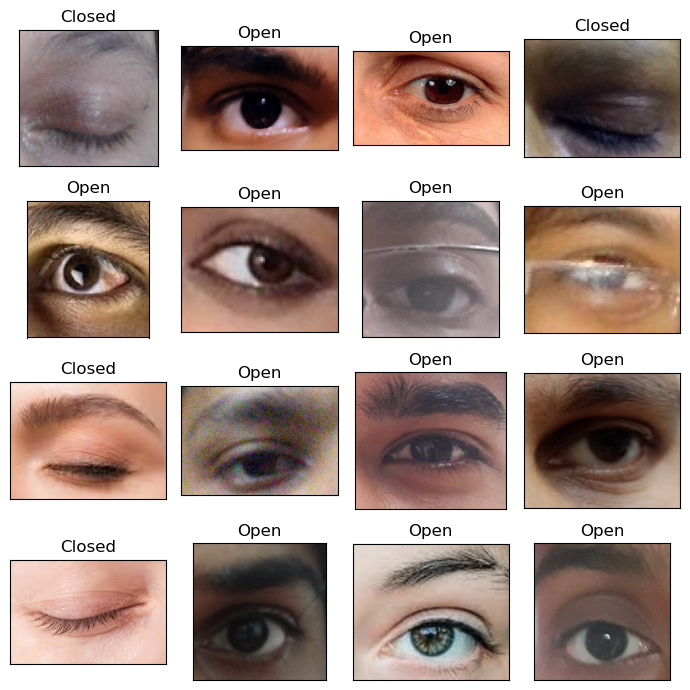

In [9]:
random_index = np.random.randint(0 , len(DF) , 20)
fig,axes = plt.subplots(nrows=4 , ncols=4 , figsize=(7,7) , subplot_kw={'xticks': [], 'yticks': []} )

for i , ax in enumerate(axes.flat):
    ax.imshow(plt.imread(DF.Filepath[random_index[i]]))
    ax.set_title(DF.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [10]:
im = plt.imread(DF.Filepath[6])
im.shape

(300, 376, 3)

In [11]:
DF = DF.sample(frac=1 , random_state=42).reset_index(drop=True)
DF

,Filepath,Label
0,E:\archive (13)\dataset_new\test\Open\_243.jpg,Open
1,E:\archive (13)\dataset_new\train\Closed\_83.jpg,Closed
2,E:\archive (13)\dataset_new\train\Closed\_390.jpg,Closed
3,E:\archive (13)\dataset_new\train\Closed\_15.jpg,Closed
4,E:\archive (13)\dataset_new\train\Open\_487.jpg,Open
...,...,...
2899,E:\archive (13)\dataset_new\test\Open\_559.jpg,Open
2900,E:\archive (13)\dataset_new\train\Open\_382.jpg,Open
2901,E:\archive (13)\dataset_new\train\Open\_415.jpg,Open
2902,E:\archive (13)\dataset_new\train\Open\_587.jpg,Open


In [12]:
test_DF = DF.iloc[len(DF)-600 :  , :]
DF = DF.iloc[:len(DF)-600 , :]

In [13]:
print(len(test_DF))
print(len(DF))

600
2304


In [14]:
test_DF.shape
DF.shape

(2304, 2)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split
train_image = train_datagen.flow_from_directory(path, target_size=(132,132) , seed=101 , batch_size=32 , class_mode='categorical' , subset='training')
test_image = train_datagen.flow_from_directory(path, target_size=(132,132) , seed=101 , batch_size=32 , class_mode='categorical' , subset='validation')

Found 1163 images belonging to 2 classes.
Found 289 images belonging to 2 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers,losses

In [31]:
CNNModel1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(132, 132, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    
    layers.MaxPooling2D((4,4)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation = 'relu', kernel_regularizer='l1'),
    layers.Dense(2, activation = 'sigmoid')
])

In [32]:
CNNModel1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model2History = CNNModel1.fit(train_image , steps_per_epoch=len(train_image) , validation_data= test_image , validation_steps=len(test_image) , epochs=10)

Epoch 1/10
37/37 [==============================] - 14s 324ms/step - loss: 18.3035 - accuracy: 0.7610 - val_loss: 13.8754 - val_accuracy: 0.8374
Epoch 2/10
37/37 [==============================] - 12s 317ms/step - loss: 11.0395 - accuracy: 0.8117 - val_loss: 8.4880 - val_accuracy: 0.7612
Epoch 3/10
37/37 [==============================] - 12s 315ms/step - loss: 6.6014 - accuracy: 0.8469 - val_loss: 5.2801 - val_accuracy: 0.7128
Epoch 4/10
37/37 [==============================] - 12s 313ms/step - loss: 4.3542 - accuracy: 0.8590 - val_loss: 4.0131 - val_accuracy: 0.8512
Epoch 5/10
37/37 [==============================] - 12s 319ms/step - loss: 3.5256 - accuracy: 0.8607 - val_loss: 3.4070 - val_accuracy: 0.8512
Epoch 6/10
37/37 [==============================] - 12s 321ms/step - loss: 2.9806 - accuracy: 0.8753 - val_loss: 2.9637 - val_accuracy: 0.8512
Epoch 7/10
37/37 [==============================] - 12s 318ms/step - loss: 2.5624 - accuracy: 0.8865 - val_loss: 2.6157 - val_accuracy: 0.8

In [34]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def TestInput(CNNModelSaved, imgMatrix):
    labels = ["Closed", "Open"]
 
    imgMatrix = cv2.resize(imgMatrix, (132, 132))
 
    imgMatrix = imgMatrix.astype('float32')
    imgMatrix /= 255.0
    imgMatrix = cv2.cvtColor(imgMatrix, cv2.COLOR_BGR2RGB)
    imgMatrix = imgMatrix.reshape((1, 132, 132, 3))
 
    c = CNNModelSaved.predict(imgMatrix)
    p = np.argmax(c)
    print(c)
 
    return labels[p]

In [37]:
import cv2

1/1 [==============================] - 0s 140ms/step
[[0.40871364 0.60746235]]
Open
Open


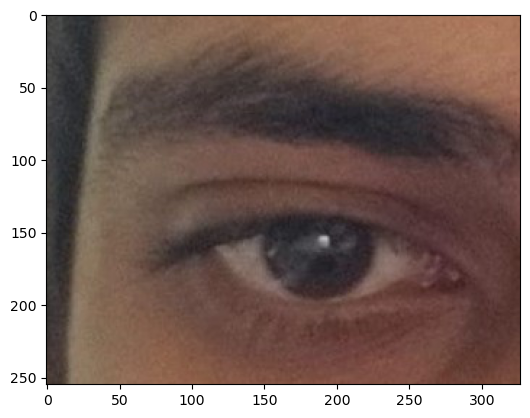

In [38]:
y_act_data = plt.imread(test_DF.Filepath.iloc[6])
y_act_label = test_DF.Label.iloc[6]
y_pred = TestInput(CNNModel1 , y_act_data)
print(y_pred)
print(y_act_label)
plt.imshow(y_act_data)